# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica. Longitud de curvas.

### Ejercicio 24.- Sabemos que si la curva $C$ viene descrita en coordenadas polares por la función $\rho=\rho(\theta)$ con $\theta \in [\theta_0,\theta_1]$, donde  $(\rho(\theta), \theta)$ son las coordenadas polares de un punto genérico de la curva, entonces su longitud viene dada por
### $$
L_C=\int_{\theta_0}^{\theta_1} \sqrt{\rho(\theta)^2+\rho'(\theta)^2}.
$$
### Usar esta fórmula para calcular la longitud de la cardiode: $$\rho=a(1+\cos\theta), \theta\in [0,2\pi],$$ con $a=4$, utilizando el método de Simpson con $n=6$ parábolas.

### NOTA: Al haber una simetría y una singularidad, se recomienda calcular la longitud ente $0$ y $\pi$, y luego multiplicar por $2$.

SOLUCIÓN

Para ver como es el uso en polares, usamos la sentencia "polar_plot". Vamos a representar como el ángulo se va moviendo. De hecho, lo que realmente vamos a dibujar es la función en polares $\rho=\theta$ donde $\theta$ representa la variable "angulo".

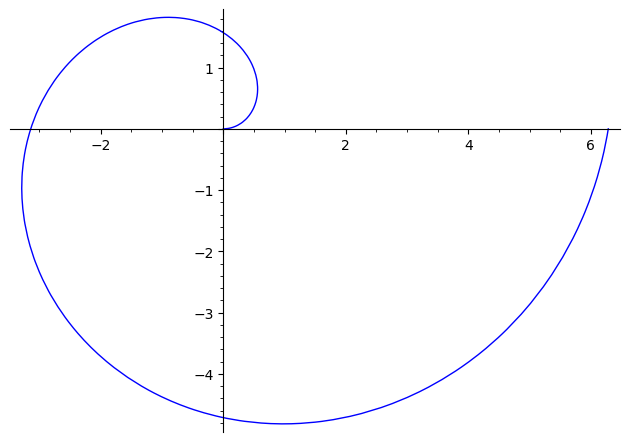

In [1]:
angulo=var('angulo')
polar_plot( angulo , (angulo, 0, 2*pi)) 

Ahora dibujamos nuestra curva cardiode. Observamos la forma de corazón que tiene. Por esa razón, se llama cardioide.

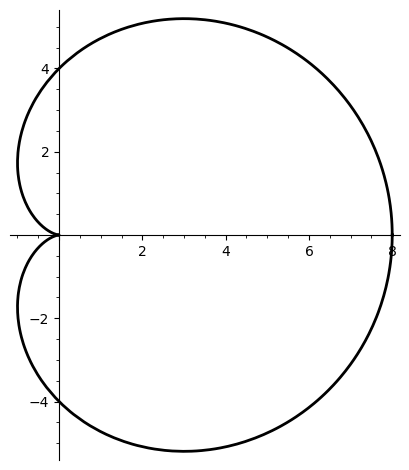

In [2]:
polar_plot(4*(1+cos(angulo)),(angulo, 0, 2*pi),color='black',thickness=2)

Tenemos que buscar la función que vamos a integrar:
$$f(\theta)=\sqrt{\rho(\theta)^2+\rho'(\theta)^2}=\sqrt{(a(1+\cos\theta))^2+(a\sin\theta)^2}=a\sqrt{1+\cos^2\theta+2\cos\theta+\sin^2\theta}=a\sqrt{2+2\cos\theta}=a\sqrt{2}\sqrt{1+\cos\theta}$$

Se puede buscar la misma función usando sage del siguiente modo:

In [3]:
rho=4*(1+cos(angulo))
g(angulo)=expand(rho^2+diff(rho,angulo)^2).simplify_trig()
f(angulo)=sqrt(g)
show(f)

angulo |--> 4*sqrt(2)*sqrt(cos(angulo) + 1)

Observamos la simetría y singularidad que nos describe el enunciado del problema: 

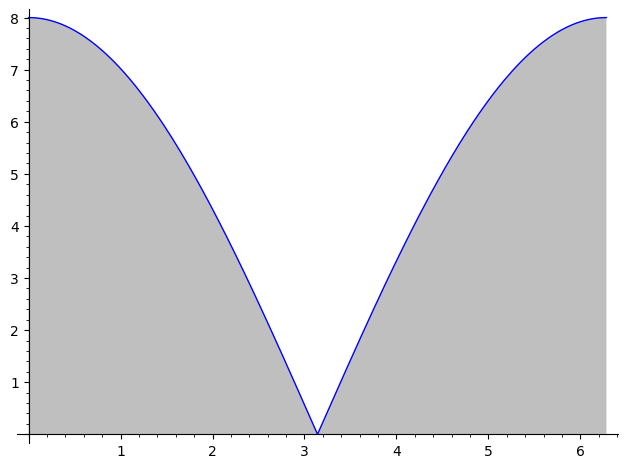

In [4]:
plot(f,0,2*pi,fill=True)

La integral de la función $f(\theta)$ se puede calcular a mano como sigue:
$$ \int f(\theta) \, d\theta = \int a\sqrt{2}\sqrt{1+\cos\theta}\, d\theta = a\sqrt{2}\int\sqrt{2}\frac{\sqrt{1+\cos\theta}}{\sqrt{2}}\, d\theta =$$

$$= a\sqrt{2}\sqrt{2}\int\sqrt{\frac{1+\cos\theta}{2}}\, d\theta =2a\int\cos(\theta/2)\, d\theta=4a\sin(\theta/2)$$

También la podemos calcular usando sage:

In [5]:
integral(f,angulo)

angulo |--> 16*sin(1/2*angulo)

Con lo cual en nuestro caso particular $a=4$, se obtiene que la longitud de la cardiode es:
$$ L=\int_{0}^{2\pi}  f(\theta) \, d\theta = 2\int_{0}^{\pi}  f(\theta) \, d\theta =2\cdot 16 \sin(\theta/2)|_{0}^{\pi}=32 \sin(\pi/2)-32 \sin(0)=32$$

Se puede hacer usando sage:

In [6]:
2*numerical_integral(f,0,pi)[0] 

32.0

Después de todos estos preliminares vamos a calcular la aproximación por el Método de Simpson con $6$ parábolas. Vamos a seleccionar el intervalo siguiente:

In [7]:
a=0
b=pi
n=6

In [8]:
X=[a+k*(b-a)/(2*n) for k in [0..2*n]]; 
show(X)

[0,
 1/12*pi,
 1/6*pi,
 1/4*pi,
 1/3*pi,
 5/12*pi,
 1/2*pi,
 7/12*pi,
 2/3*pi,
 3/4*pi,
 5/6*pi,
 11/12*pi,
 pi]

Ahora aplicamos la fórmula del Método de Simpson: 
 $$  \int_{\theta_0}^{\theta_1} f(\theta) \, d\theta \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{\theta_1-\theta_0}{6n}\left(f(\theta_0)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(\theta_1)\right) $$

In [9]:
simpson=(b-a)/(6*n)*(f(X[0])+4*sum(f(X[2*k-1]) for k in [1..n])+2*sum(f(X[2*k]) for k in [1..n-1])+f(X[2*n]))
simpson.n()

16.0000261510173

Por supuesto, finalmente la integral pedida es el doble de este resultado.

In [10]:
2*simpson.n()

32.0000523020346

<strong>Observaciones adicionales:</strong>

Podemos dibujar este problema para observar que se está haciendo. Y calcular la cota del error.

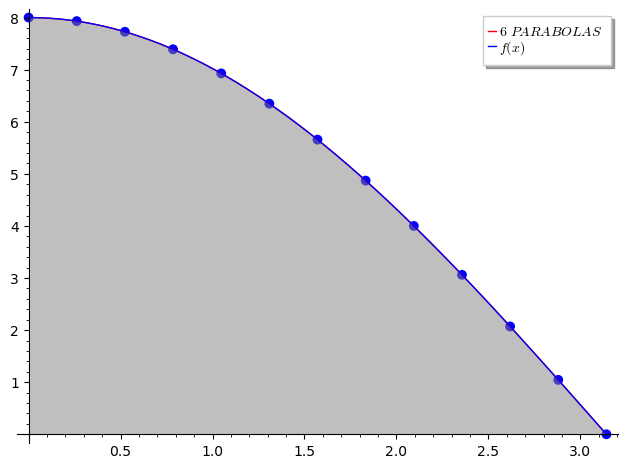

In [11]:
XY=[(X[i],f(X[i])) for i in [0..2*n]]
P=piecewise([ [ (X[2*(i-1)],X[2*i]),RR['x'].lagrange_polynomial(
[XY[2*(i-1)],XY[2*i-1],XY[2*i]]) ] for i in [1..n] ] ,var=x)
plot(P,a,b,color='red',legend_label='$6\,\,PARABOLAS$',fill=True)+plot(f,a,b,legend_label='$f(x)$')+point2d(XY,size=50)

Veamos qué cota del error absoluto cometido podemos dar. Sabemos que 
<p style="text-align: center;">$\displaystyle \left| {\rm Simpson}_{6}(f)-\int_a^b f(\theta) \, d\theta \right| \leq \dfrac{(b-a)^5}{180\cdot  (2\cdot 6)^4}\cdot M$</p>
<p>siendo $M>0$ una constante tal que $|f^{(4)}(\theta)|\leq M$ para todo $\theta\in [a,b]=[0,\pi]$. Para determinar $M$ representamos gráficamente $|f^{(4)}(\theta)|$ en el intervalo $[a,b]=[0,\pi]$:</p>

In [12]:
dc(angulo)=diff(f(angulo),angulo,4) #derivada cuarta
show(dc.simplify_trig())

angulo |--> -1/2*(cos(angulo)^4 + 4*cos(angulo)^3 + 6*cos(angulo)^2 + 4*cos(angulo) + 1)/(((sqrt(2)*cos(angulo) + 3*sqrt(2))*sin(angulo)^2 - 4*sqrt(2)*cos(angulo) - 4*sqrt(2))*sqrt(cos(angulo) + 1))

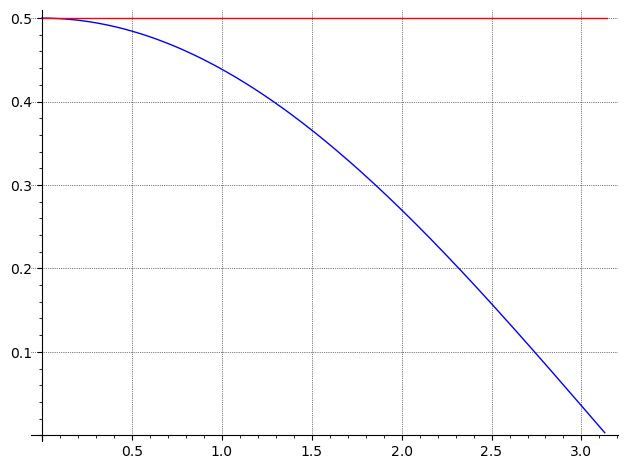

In [13]:
plot(abs(diff(f,angulo,4)),angulo,0,pi,gridlines=True)+plot(0.5,angulo,0,pi,color='red')

In [14]:
M=0.5;
cota=(b-a)^5/(180*(2*n)^4)*M;
cota.n()

0.0000409941493035839